In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import ks_2samp
from statannot import add_stat_annotation

plt.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

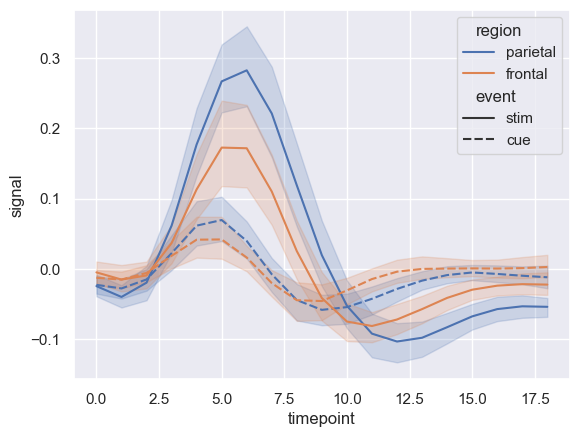

In [2]:
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
# 음영 부분은 유의수준. 95퍼센트 내에 존재한다는 의미.
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

In [3]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [4]:
df = pd.read_csv('C:/Users/user/Desktop/lecfile/nov/221117/CS_T_T_STD_COST.csv', encoding = 'cp949')

## 실습
* 위 데이터를 이용해 선 그래프 글기
* 분류 대상 : 영역분류 (1,4)
* 표현할 값 : 평가연도에 따른 일일대당원가

In [5]:
df

,연번,업체아이디,킬로미터당원가,관할행정아이디,입력일자,최종처리자아이디,수정일자,영역분류,일일대당원가,평가연도,평가차수
0,1,1041,622,3.0,2012-07-10,1,2012-07-10,1,307546,2012,19
1,2,1000,461,30.0,2012-07-10,1,2012-07-10,2,305872,2012,19
2,3,1006,511,30.0,2012-07-10,1,2012-07-10,2,289164,2012,19
3,4,1010,494,30.0,2012-07-10,1,2012-07-10,2,214690,2012,19
4,5,1011,374,30.0,2012-07-10,1,2012-07-10,2,219583,2012,19
...,...,...,...,...,...,...,...,...,...,...,...
3274,3275,1036,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3275,3276,1038,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3276,3277,1039,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3277,3278,1025,622,3.0,2012-07-10,1,2012-07-10,1,307546,2012,19


In [6]:
m = [i in [1,4] for i in df['영역분류']]
df_1 = df[m]

In [10]:
df_1['영역분류'].unique()

array([1, 4], dtype=int64)

Text(0.5, 1.0, '평가연도에 따른 일일대당원가')

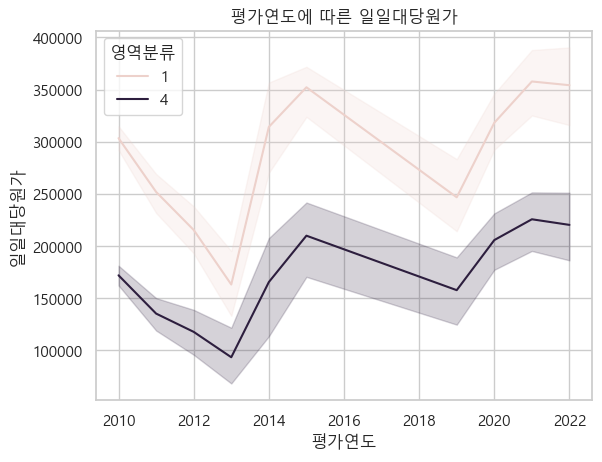

In [9]:
# 영역 1이 영역 4보다 유의하게 높다는 것을 알 수 있다.
# 유의수준도 전혀 겹치지 않기 때문.

sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic'

sns.lineplot(x="평가연도", y="일일대당원가",
             hue="영역분류", data=df_1)

plt.title('평가연도에 따른 일일대당원가')

## 쿼리

In [13]:
# 이렇게도 추려낼 수 있다.

query_expr = '영역분류 == 1 or 영역분류 == 4'
df2 = df.query(query_expr)

In [14]:
df2

,연번,업체아이디,킬로미터당원가,관할행정아이디,입력일자,최종처리자아이디,수정일자,영역분류,일일대당원가,평가연도,평가차수
0,1,1041,622,3.0,2012-07-10,1,2012-07-10,1,307546,2012,19
6,7,1030,479,7.0,2012-07-15,1,2012-07-10,1,248352,2012,19
7,8,1044,1,NaN,2012-07-09,1,2012-07-09,1,2,2012,20
8,9,1030,1,7.0,2012-07-09,1,2012-07-09,1,2,2012,20
9,10,1044,1,7.0,2012-07-09,1,2012-07-09,1,2,2012,20
...,...,...,...,...,...,...,...,...,...,...,...
3274,3275,1036,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3275,3276,1038,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3276,3277,1039,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3277,3278,1025,622,3.0,2012-07-10,1,2012-07-10,1,307546,2012,19


In [18]:
# 잠깐.. 안된다.

def num2(x, y, z, w):
    if x == y and z == w:
        return 1

query_expr = '@num2(업체아이디, 1041, 영역분류, 1) == 1'
df3 = df.query(query_expr)
print(df3)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

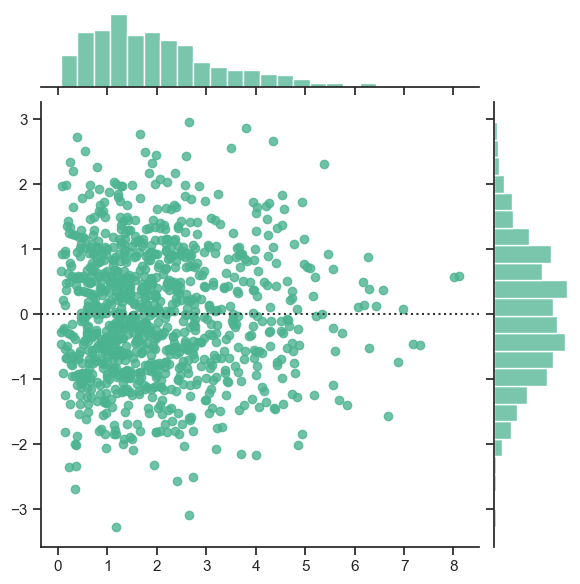

In [24]:
sns.set_theme(style="ticks")
plt.rcParams['font.family'] = 'Malgun Gothic'

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x=x, y=y, kind="resid", color="#4CB391")

## 실습
* 위데이터에서 킬로미터당원가와 일일대당원가의 관계를 시각화.
* hexbin plot 이용

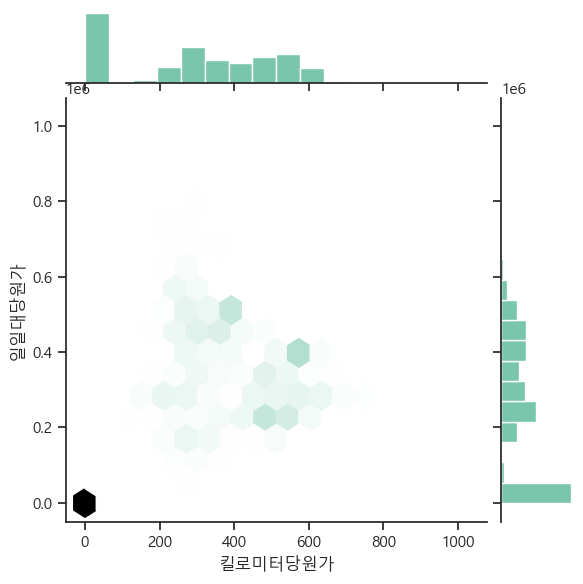

In [39]:
sns.set_theme(style="ticks")
plt.rcParams['font.family'] = 'Malgun Gothic'

x = df['킬로미터당원가']
y = df['일일대당원가']

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

In [31]:
df['킬로미터당원가'].unique()

n = [i > 2 for i in df['킬로미터당원가']]

In [33]:
df2_1 = df[n]

In [36]:
p = [i>1111 for i in df2_1['일일대당원가']]
df2_2 = df2_1[p]

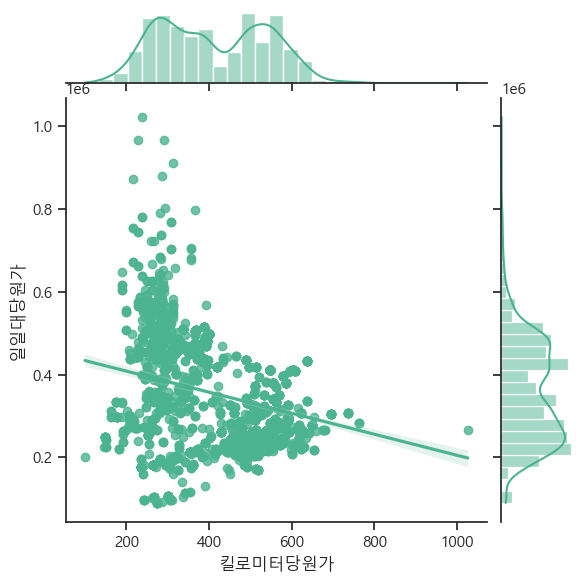

In [40]:
sns.set_theme(style="ticks")
plt.rcParams['font.family'] = 'Malgun Gothic'

x = df2_2['킬로미터당원가']
y = df2_2['일일대당원가']

sns.jointplot(x=x, y=y, kind="reg", color="#4CB391")

In [46]:
r = stats.spearmanr(df2_2['킬로미터당원가'],df2_2['일일대당원가'])[0]
p = stats.spearmanr(df2_2['킬로미터당원가'],df2_2['일일대당원가'])[1]

Text(600, 1000000, ' r = -0.2295 , p = 0.0000')

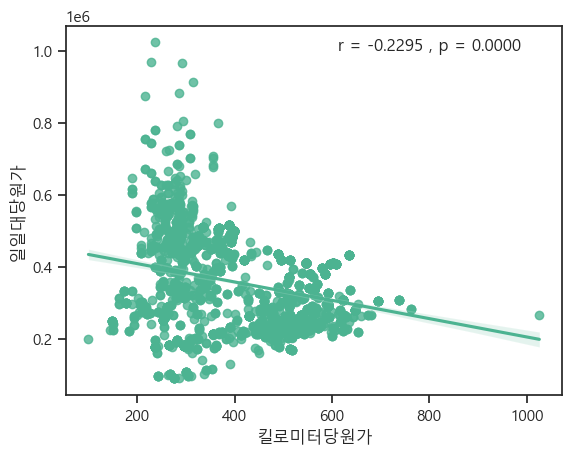

In [53]:
# 리그레션플롯을 그리는 것과, 조인트플롯에서 리그레션 플롯을 그리는 방법이 있다.
# 조인트플롯에서 리그레션 플롯을 그리는 경우에는 표현이 제한적일 수 있으므로
# 따로 그리는 것을 권장한다.

sns.regplot(x=x, y=y, color="#4CB391")
plt.text(x = 600, y = 1000000,s = ' r = %.4f , p = %.4f' %(r,p))

In [43]:
# 현재는 정규성 검증을 하지 않았기 때문에 spearmanr 을 사용한다.
# pvalue 값이 매우 낮기 때문에, 두 집단은 선형적 관계를 가진다고 볼 수 있다.
# correlation 값이 음의 값이 나오고 있고, 절댓값이 0.22정도이므로 어느정도의 음의 관계를 가진다고 볼 수 있다.

stats.spearmanr(df2_2['킬로미터당원가'],df2_2['일일대당원가'])

SpearmanrResult(correlation=-0.2295104275609316, pvalue=2.6796061754172996e-29)

<AxesSubplot:xlabel='clarity', ylabel='carat'>

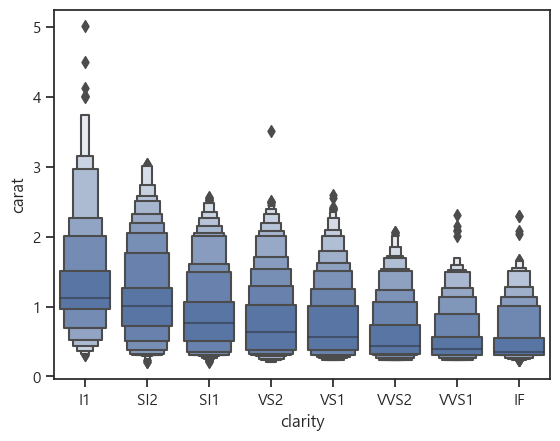

In [54]:
# order 는 정렬

diamonds = sns.load_dataset("diamonds")
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.boxenplot(x="clarity", y="carat",
              color="b", order=clarity_ranking,
              scale="linear", data=diamonds)

In [55]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [56]:
df

,연번,업체아이디,킬로미터당원가,관할행정아이디,입력일자,최종처리자아이디,수정일자,영역분류,일일대당원가,평가연도,평가차수
0,1,1041,622,3.0,2012-07-10,1,2012-07-10,1,307546,2012,19
1,2,1000,461,30.0,2012-07-10,1,2012-07-10,2,305872,2012,19
2,3,1006,511,30.0,2012-07-10,1,2012-07-10,2,289164,2012,19
3,4,1010,494,30.0,2012-07-10,1,2012-07-10,2,214690,2012,19
4,5,1011,374,30.0,2012-07-10,1,2012-07-10,2,219583,2012,19
...,...,...,...,...,...,...,...,...,...,...,...
3274,3275,1036,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3275,3276,1038,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3276,3277,1039,547,1.0,2012-07-10,1,2012-07-10,1,410318,2012,19
3277,3278,1025,622,3.0,2012-07-10,1,2012-07-10,1,307546,2012,19


## 실습
* 관할행정아이디(임의의 6개에 따른 킬로미터당 원가를 boxenplot으로 나타낸다.
* 관할행정아이디를 통계적으로 유의한 차이가 있는지 확인한다.